In [25]:
import numpy as np
from google.colab import drive
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import math

# Лабораторная работа 3.6
Реализация алгоритма спектрального вычитания (spectral subtraction) для шумоподавления речевых сигналов.

In [27]:
Fs = 100000
c = 1125
d = [[0, 0, 10],[20, 0, 10],[20, 20, 10],[0, 20, 10]]

In [28]:
receiver = open('/Receiver.txt').read().split()
transmitter = open('/Transmitter.txt').read().split()

In [29]:
r_t = [float(c) for c in receiver]

In [30]:
s_t = [[] for i in range(4)]
for i in range(4):
    s_t[i] = [float(c) for c in transmitter[500 * i:500*(i+1)]]

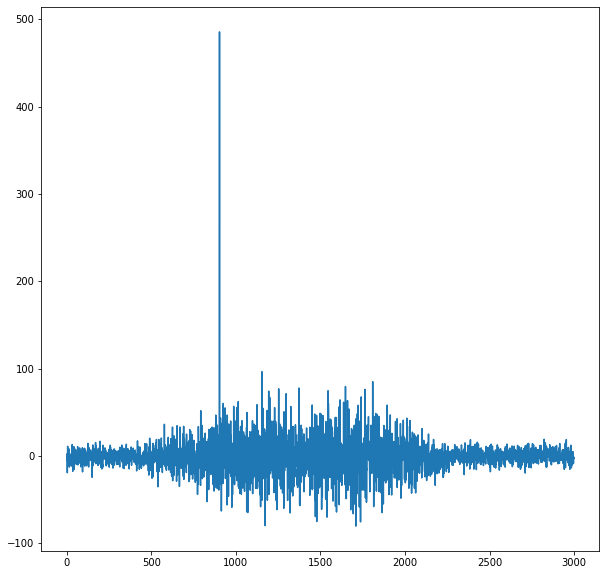

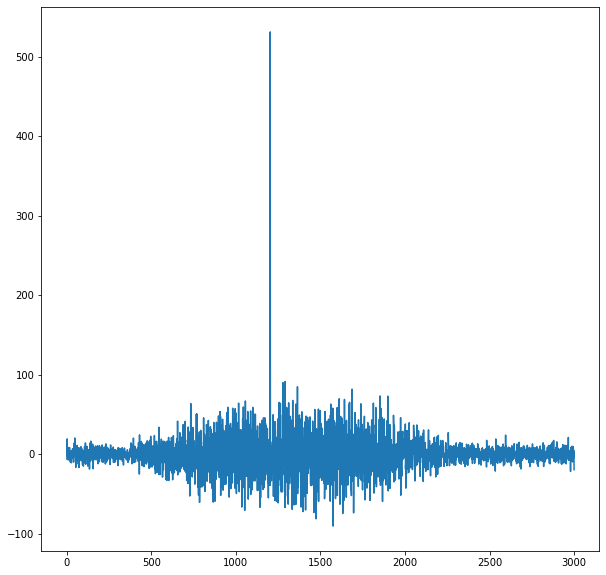

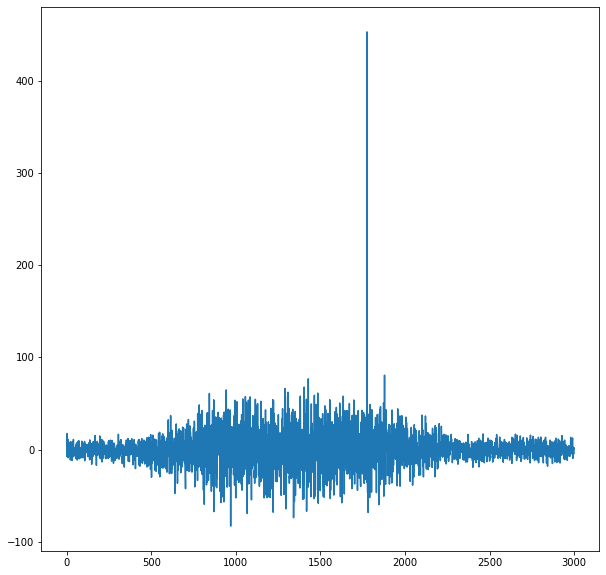

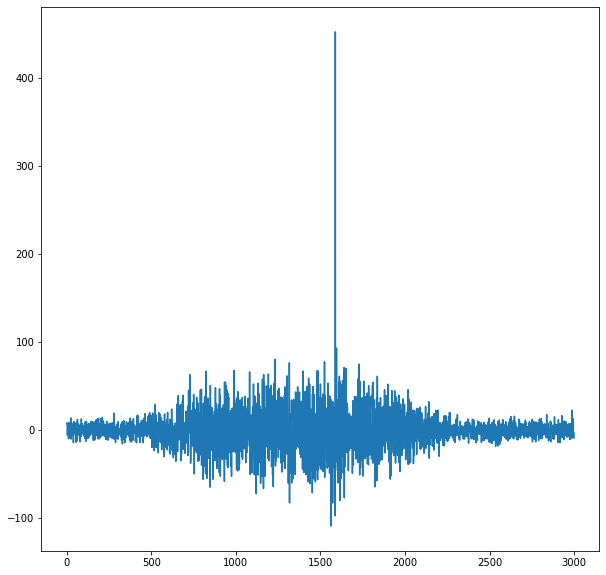

In [31]:
corrs = [[] for i in range(4)]
for i in range(4):
    corrs[i] = np.correlate(r_t, s_t[i], mode="valid")
    plt.figure(figsize=(10, 10))
    plt.plot(range(len(corrs[i])), corrs[i])

In [32]:
argmax_corrs = np.array([np.argmax(corrs[i]) for i in range(4)])
argmax_corrs

array([ 903, 1203, 1775, 1588])

In [33]:
ti_arg = argmax_corrs / Fs

In [34]:
Ri_arg = ti_arg * c

In [35]:
def F_opt_arg(x):
    return (math.sqrt(((x[0] - d[0][0])**2 + (x[1] - d[0][1])**2 + (x[2] - d[0][2])**2)) - Ri_arg[0])**2 + \
          (math.sqrt(((x[0] - d[1][0])**2 + (x[1] - d[1][1])**2 + (x[2] - d[1][2])**2)) - Ri_arg[1])**2 + \
          (math.sqrt(((x[0] - d[2][0])**2 + (x[1] - d[2][1])**2 + (x[2] - d[2][2])**2)) - Ri_arg[2])**2 + \
          (math.sqrt(((x[0] - d[3][0])**2 + (x[1] - d[3][1])**2 + (x[2] - d[3][2])**2)) - Ri_arg[3])**2

In [36]:
minimize(F_opt_arg, [0., 0., 0.])

      fun: 3.3975594558445255e-05
 hess_inv: array([[ 0.25387961, -0.02815919,  0.03622463],
       [-0.02815919,  0.28927843, -0.01904686],
       [ 0.03622463, -0.01904686,  1.28280369]])
      jac: array([-1.35245000e-06, -2.52848895e-06,  1.09215534e-06])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([8.0035784 , 4.60493232, 5.76024983])